In [80]:
from functions import *

In [81]:
import sys, importlib
importlib.reload(sys.modules['functions'])
from functions import *

mapas da Ew e etc

comparar valores de EW calculados com e sim binning

Voronoi binning

espetro da parte central e depois dependencia radial do espetro etc

ver linha sodio p diferentes zonas, zonas integradas

**Analysing SN2010ev, in galaxy NGC 3244, which has redshift z=0.009213 ± 7.00e-6 (He)**

# To-do




- ajuste c/ gaussianas - modelo c/ parametros, é preciso tirar continuo (ver paper c/claudia e santiago), continuo (oq nao é gerado pelas linhas, tem+eratura, luz estrelas etc)
medir also com metodo nao parametrico

ler artigo metodo para medir linhas sodio

Merrifield galactic astronimy

galaxy formation longair

# Importing data

In [3]:
#import data
file_name="../SN2010ev.fits"
data = fits.open(file_name)
cube = data[1].data   # this is the cube, a (3681 x 341 x 604) matrix with fluxes at different 3681 wavelengths and 308 x 318 spatial pixels ("spaxels")
header = data[1].header # this has information on the data cube
ecube = data[2].data # this is the cube uncertainty (3681 x 341 x 604)
print(np.shape(cube))


print(cube[0])
print(cube[0][200][300])

x_len=len(cube[0][0])
y_len=len(cube[0])

(3681, 341, 604)
[[     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 ...
 [     nan      nan      nan ... 69.65055      nan      nan]
 [     nan      nan      nan ... 68.30897      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]]
91.866684


In [4]:
#  -- following is to the get the wavelength array
CRVAL = float(header["CRVAL3"])
NAXIS = int(header["NAXIS3"])
CDELT = float(header["CD3_3"])
CRPIX = float(header["CRPIX3"])
wave = np.array(CRVAL + CDELT * (np.arange(NAXIS) - CRPIX))

In [5]:
#testing function findWavelengths
result = findWavelengths(wave, 5000)
print("Closest elements:", result)

result = findWavelengths(wave, [5000,4000,6000])
print("Closest elements:", result)

Closest elements: (4999.6923828125, 201)
Closest elements: [(4999.6923828125, 201), (4748.4423828125, 0), (5999.6923828125, 1001)]


# Plotting cube images

## Plotting cube at Hα

In [6]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

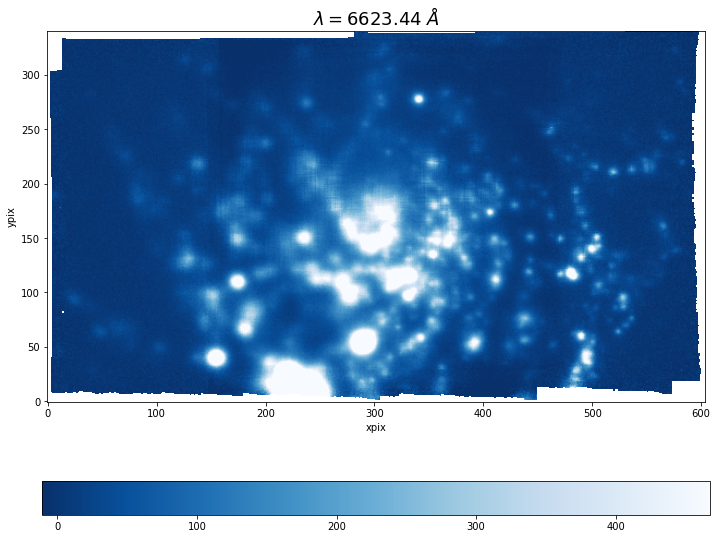

In [7]:
img_data=cube[index]

plot_image(img_data,wavelen, index, 'Blues_r')

In [8]:
print('Min:', np.nanmin(img_data))
print('Max:', np.nanmax(img_data))
print('Mean:', np.nanmean(img_data))
print('Stdev:', np.nanstd(img_data))

Min: -67.27145
Max: 6526.5054
Mean: 62.408295
Stdev: 175.11049


In [9]:
len(img_data.flatten())
y_len*x_len

205964

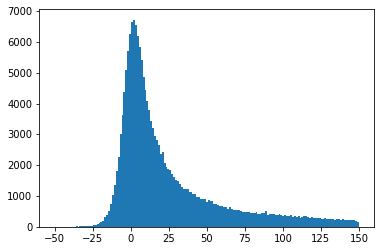

In [10]:
histogram = plt.hist(img_data.flatten(), bins='auto',range=[-50,150])

## Plotting cube at various wavelengths

In [11]:
W=5000
V=5510 #V (Visible/Green): ~551 nm
R=6580 #R (Red): ~658 nm

halpha=6563

xx=[W,V,R,halpha_obs]

selection=findWavelengths(wave, xx)

waves=np.transpose(selection)[0]
indices=np.transpose(selection)[1]
indices = indices.astype(int)

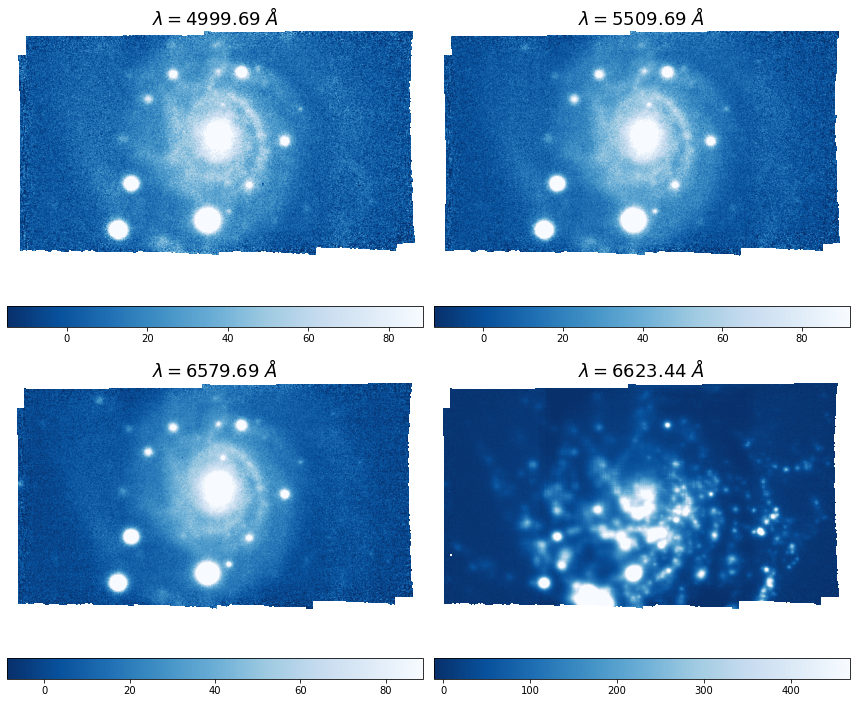

In [12]:
plot_image(cube[indices],wave[indices], indices, 'Blues_r')

## Making a gif around Halpha

In [13]:
xx=[halpha_obs-10,halpha_obs+10]

selection=findWavelengths(wave,xx)

waves=np.transpose(selection)[0]
indices=np.transpose(selection)[1]
indices = indices.astype(int)

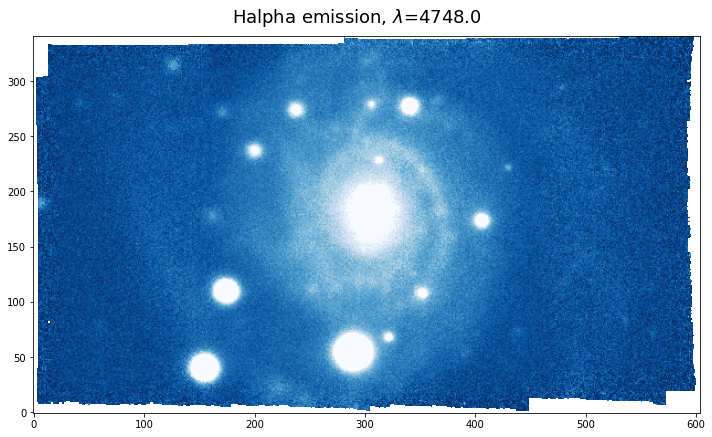

In [14]:


image_array = cube[indices[0]:indices[1]]



fig, ax = plt.subplots(figsize=(10, 8))


# Set the initial image
image=cube[indices[0]];
lo,up = np.nanpercentile(image,2),np.nanpercentile(image,98)

im = ax.imshow(image, animated=True,cmap="Blues_r",origin='lower',clim=(lo,up))
plt.tight_layout()
def update(i):
    im.set_array(image_array[i])
    fig.suptitle("Halpha emission, $\lambda$="+str(round(wave[i],0)),fontsize=18,y=0.85)
    
    return im,


# Create the animation object
animation_fig = animation.FuncAnimation(fig, update, frames=len(image_array), interval=400, blit=True,repeat_delay=15,)

# Show the animation
plt.tight_layout()
plt.show()

animation_fig.save("im.gif")

In [15]:
from PIL import Image

im = []
for n in range(20):
    arr = np.random.randint(low = 0, high = 255, size = (300, 300, 3))
    im.append(Image.fromarray(arr.astype('uint8')))

im[0].save('im.gif', save_all=True, append_images=im[1:], optimize=False, duration=200, loop=0)

## Plotting median within a certain waveband

0 1
[4748.44238281 4749.69238281]


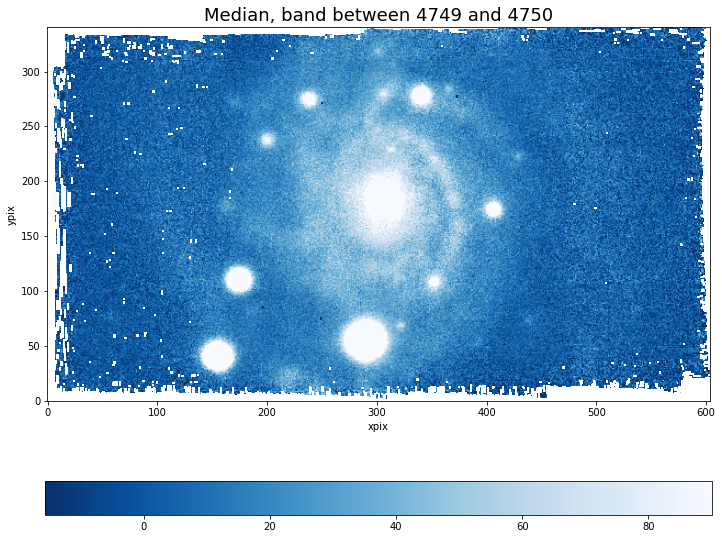

In [16]:
med=median(cube,wave,[4749,4750])


plot_image(med,wavelengths=[4749,4750],index=[4749,4750], colormap='Blues_r',title='Median, band between 4749 and 4750')


#median(cube,wave,[np.max(wave),np.min(max)])


## Plotting average within a certain waveband

0 1
[4748.44238281 4749.69238281]


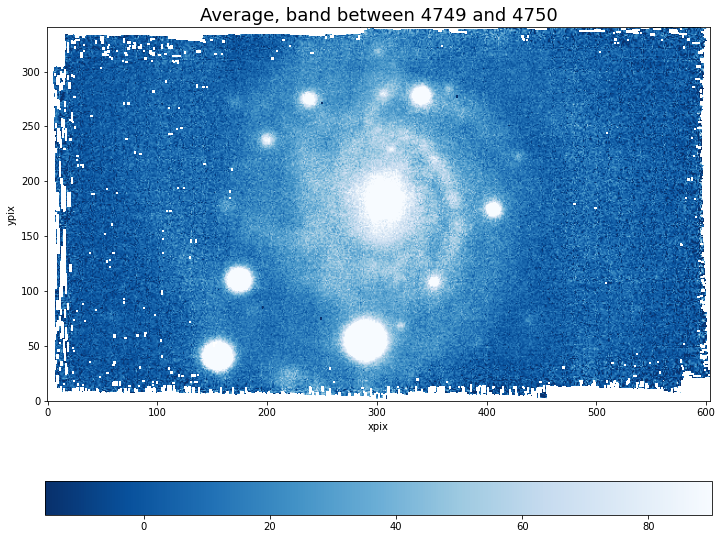

In [17]:
ave=average(cube,wave,[4749,4750])


plot_image(ave,wavelengths=[4749,4750],index=[4749,4750], colormap='Blues_r',title='Average, band between 4749 and 4750')


#ave(cube,wave,[np.max(wave),np.min(max)])


# Binning

## Binning 2x2

In [18]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

img_data=cube[index]

print("dimensions before binning: ", len(img_data),len(img_data[0]))

binned_data=binning(img_data,4)

print("dimensions after binning: ", len(binned_data),len(binned_data[0]))


dimensions before binning:  341 604
dimensions after binning:  86 151


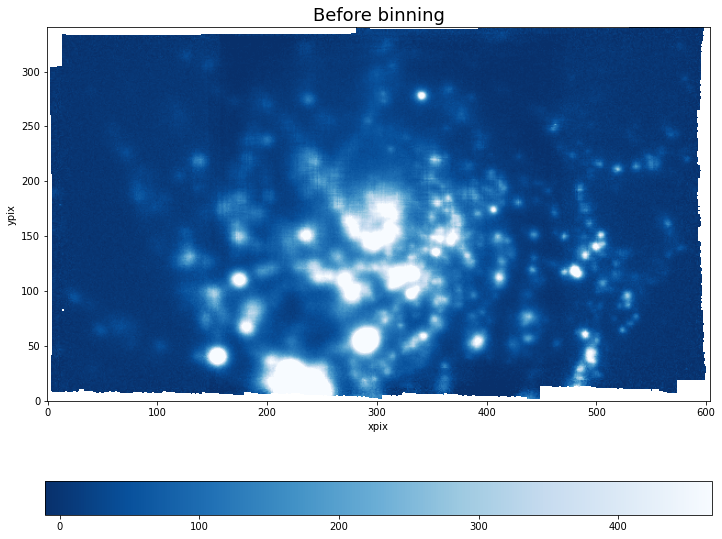

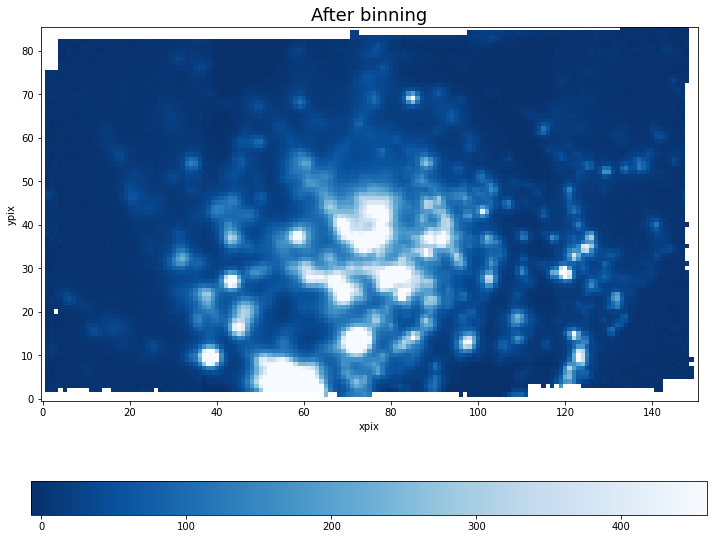

In [19]:
plot_image(img_data,wavelen, index, 'Blues_r', "Before binning")
plot_image(binned_data,wavelen, index, 'Blues_r',"After binning")

In [20]:
np.shape(cube)

(3681, 341, 604)

## Region w/ high SNR

Zoom in area of background signal

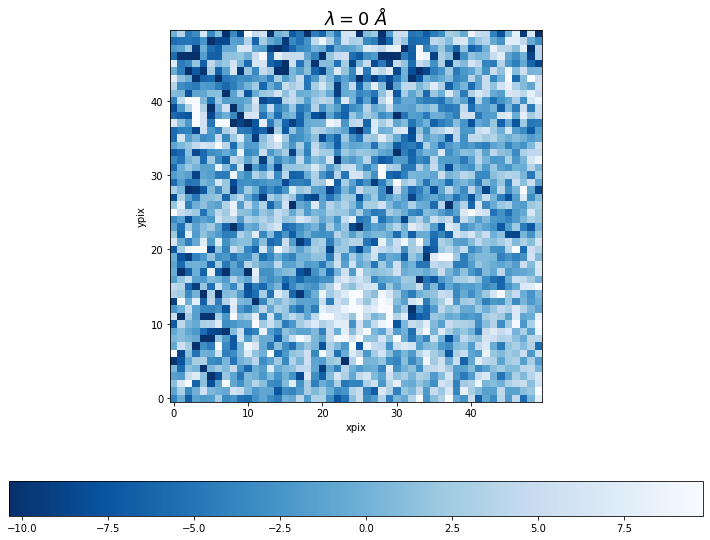

In [21]:
bg=img_data[270:320, 15:65]
plot_image(bg,0,0,'Blues_r')

In [22]:
# background noise
noise = np.nanstd(bg)

snr_map = img_data / noise
mean_snr = np.nanmean(snr_map)
threshold = 0.5 * mean_snr


square_size = 1000


#best square
best_square = None
best_snr = -np.inf  
best_coords = (0, 0)


h, w = image.shape
for y in range(0, h - square_size + 1, square_size):
    for x in range(0, w - square_size + 1, square_size):
        
        block = snr_map[y:y+square_size, x:x+square_size]

        block_mean_snr = np.mean(block)

        if block_mean_snr > best_snr:
            best_snr = block_mean_snr
            best_square = block
            best_coords = (y, x)

if best_square is not None:
    np.save("../best_snr_square.npy", best_square)
    print(f"Saved the best SNR square at {best_coords} with mean SNR {best_snr:.2f}")

best_square = np.load("../best_snr_square.npy")
print(best_square)

[[24.733227  23.659376  23.296698  ...  8.002031   6.8485003  6.3015223]
 [25.289423  24.369799  22.9598    ...  6.986258   6.1466255  7.6385193]
 [23.431923  22.804512  24.332674  ...  7.397483   7.678427   5.837128 ]
 ...
 [31.349007  31.20333   35.570824  ... 10.715965  10.636392  11.201308 ]
 [28.347382  27.447086  30.333021  ...  9.965655  11.025977  11.6718   ]
 [25.059385  26.852942  27.987513  ...  9.946177  11.049753  11.41961  ]]


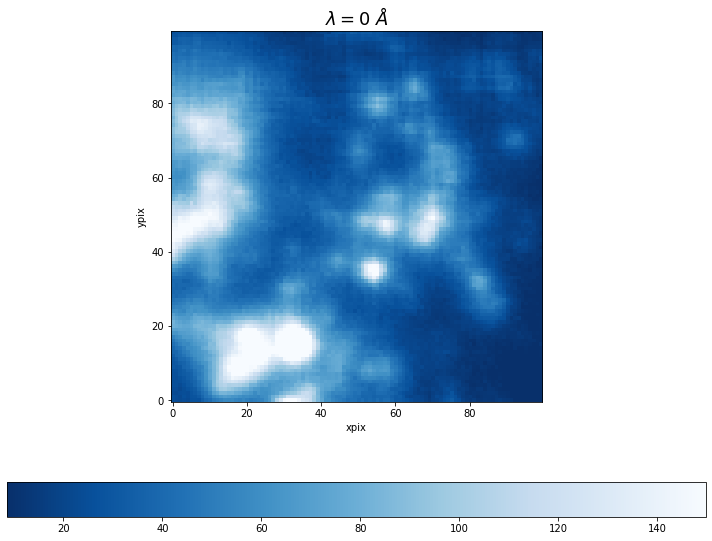

In [23]:
plot_image(best_square,0,0,'Blues_r')

## Binning of galaxy bulge

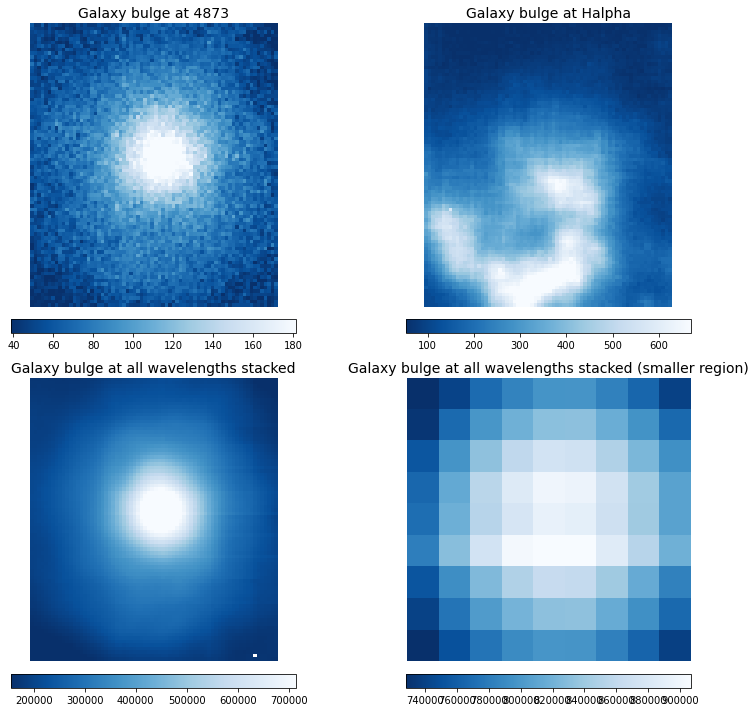

In [24]:
bulge=cube[:,140:220,270:340];
ebulge=ecube[:,140:220,270:340];

small_bulge=cube[:,178:187,302:311]
#small_bulge=cube[:,181:185,305:307]

images = [
    bulge[100],
    bulge[index], 
    stack_all(bulge),
    stack_all(small_bulge)
]

titles = [
    "Galaxy bulge at "+str(int(round(wave[100],0))),
    "Galaxy bulge at Halpha",
    "Galaxy bulge at all wavelengths stacked",
    "Galaxy bulge at all wavelengths stacked (smaller region)"
]

plot_images(images, wavelengths=[0, 0, 0, 0], colormap='Blues_r', titles=titles)


In [25]:
stacked_bulge=stack(bulge,wave,number_images=10,central_wavelength=halpha_obs)
stacked_ebulge=stack(ebulge,wave,number_images=10,central_wavelength=halpha_obs)

binned_bulge=binning(bulge[index],4)
ebinned_bulge=binning(ebulge[index],4)

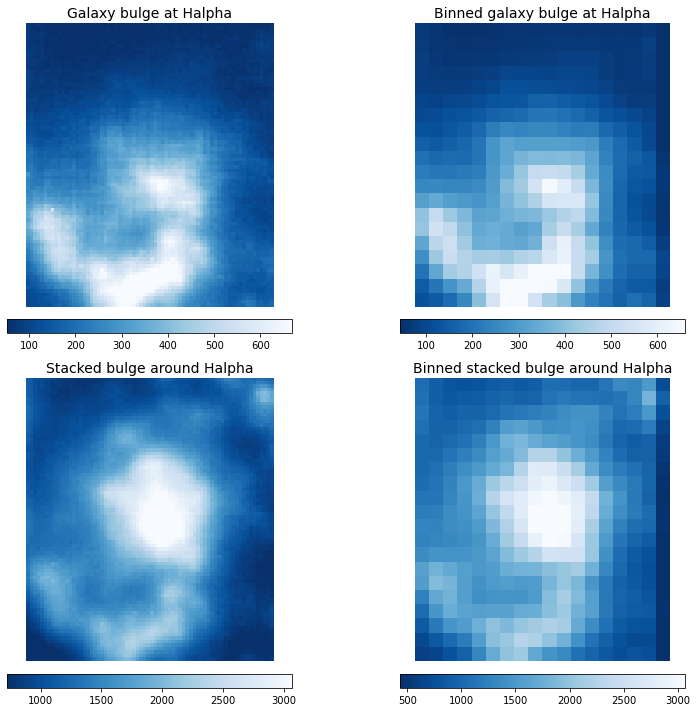

In [26]:
images = [
    bulge[index], 
    binned_bulge, 
    stacked_bulge, 
    binning(stacked_bulge, 4)
]

titles = [
    "Galaxy bulge at Halpha",
    "Binned galaxy bulge at Halpha",
    "Stacked bulge around Halpha",
    "Binned stacked bulge around Halpha"
]

plot_images(images, wavelengths=[0, 0, 0, 0], colormap='Blues_r', titles=titles)


In [27]:
binned_stacked_bulge=binning(stack(bulge,wave,number_images=10,central_wavelength=halpha_obs),4)
binned_stacked_ebulge=binning(stack(ebulge,wave,number_images=10,central_wavelength=halpha_obs),4)

print("Median SNR before binning = ",np.median(signaltonoise(stacked_bulge,stacked_ebulge)), "\nMedian SNR after stacking&binning = ",np.median(signaltonoise(binned_stacked_bulge,binned_stacked_ebulge)))
      

Median SNR before binning =  4.6879454 
Median SNR after stacking&binning =  4.642662903020382


so SNR is lower after binning?(*) could be because i am computing the same SNR for a bin for all the pixels that were collapsed

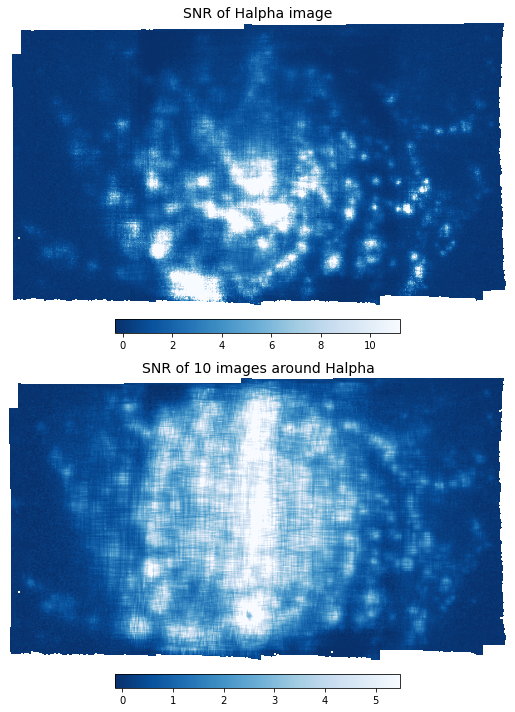

Average of SNR in the image is  1.5096688
Average of SNR in the image is  1.4523461
Median of SNR in the image is  0.4109841
Median of SNR in the image is  0.79283464

SNR gets worse on average, but not in median(**)


In [28]:
snr1=signaltonoise(cube[index],ecube[100])
#plot_image(snr,0,0,colormap='Blues_r',title="SNR of Halpha image")

stacked_galaxy=stack(cube,wave,number_images=10,central_wavelength=halpha_obs)
stacked_uncertainties=stack(ecube,wave,number_images=10,central_wavelength=halpha_obs)


snr2=signaltonoise(stacked_galaxy,stacked_uncertainties)

plot_images([snr1,snr2],wavelengths=[0, 0],colormap='Blues_r',titles=["SNR of Halpha image","SNR of 10 images around Halpha"])

print("Average of SNR in the image is ",np.nanmean(snr1))
print("Average of SNR in the image is ",np.nanmean(snr2))
print("Median of SNR in the image is ",np.nanmedian(snr1))
print("Median of SNR in the image is ",np.nanmedian(snr2))
print("\nSNR gets worse on average, but not in median(**)")

## Stacked galaxy bulge spetra

In [29]:
def avg_spectra_of_region(data,z=0):
    wavelengths=len(data)
    region_area=len(data[0])*len(data[0][0])
    """spec_avg=np.zeros(wavelengths)
    for i in range(0,wavelengths):
        spec_avg[i]=np.sum(data[i,:,:])/(region_area)"""
    # sum along the first two axes (rows and columns of the region) and then average
    spec_avg = np.sum(data, axis=(1, 2)) / region_area
    
    return spec_avg

def median_spectra_of_region(data, z=0):
    spec_median = np.median(data, axis=(1, 2))
    return spec_median


Text(0.5, 1.0, 'Median spectra of galaxy bulge')

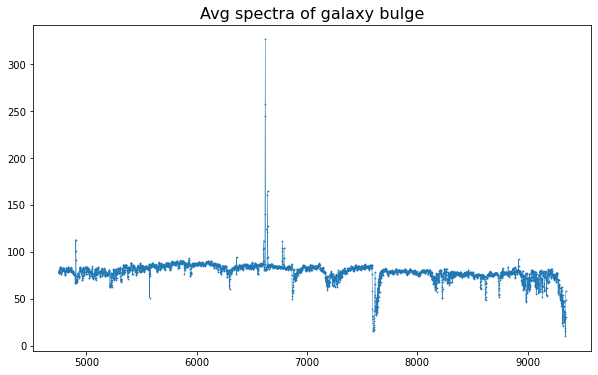

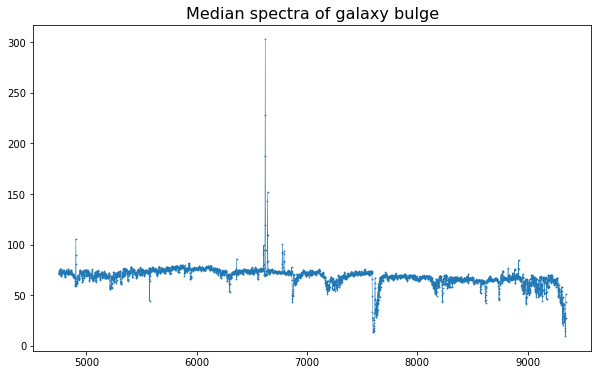

In [30]:
plt.figure(figsize=(10,6))

plt.plot(wave,avg_spectra_of_region(bulge),linewidth=0.5,alpha=0.95)
plt.scatter(wave,avg_spectra_of_region(bulge),s=0.5)
plt.title("Avg spectra of galaxy bulge",fontsize=16)



plt.figure(figsize=(10,6))

median_bulge=median_spectra_of_region(bulge)
plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)
plt.title("Median spectra of galaxy bulge",fontsize=16)




In [31]:
new_wave=wave/(1+z)
halpha_obs

6623.2630764

in x_obs we look for halpha_obs=6562.8*(1+z)

so in x_obs/(1+z) we look for 6562.8

Text(0.5, 1.0, 'Median spectra of smaller region of galaxy bulge')

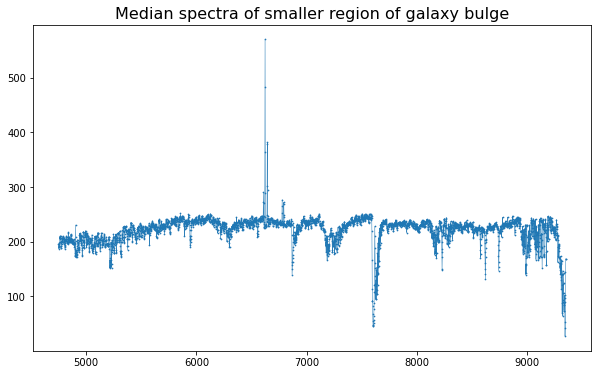

In [32]:
plt.figure(figsize=(10,6))



plt.plot(wave,median_spectra_of_region(small_bulge),linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_spectra_of_region(small_bulge),s=0.5)
plt.title("Median spectra of smaller region of galaxy bulge",fontsize=16)

#plt.xlim(halpha_obs-50,halpha_obs+50)

## Different galaxy regions

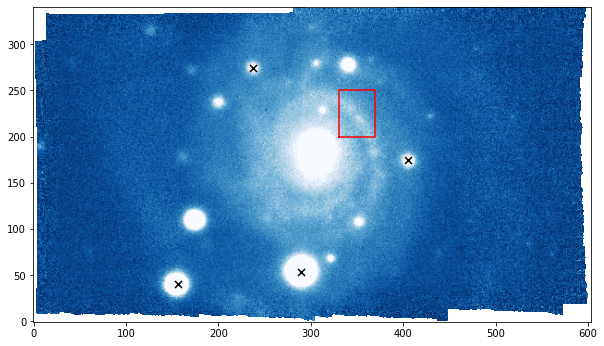

In [33]:
arm=cube[:,200:250,330:370]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [330, 330, 370, 370, 330]
y_coords = [200, 250, 250, 200, 200] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline


star_x=[289,156,237,405]#175
star_y=[53,40,274,175]#110
plt.scatter(star_x,star_y,s=50,marker='x',c='black')


spectra at star (single pixel)

In [34]:
arr=np.transpose((star_x,star_y))
lbls = ["Star (single pixel spectra) at (x,y)= ({},{})".format(row[0], row[1]) for row in arr]

In [35]:
lbls

['Star (single pixel spectra) at (x,y)= (289,53)',
 'Star (single pixel spectra) at (x,y)= (156,40)',
 'Star (single pixel spectra) at (x,y)= (237,274)',
 'Star (single pixel spectra) at (x,y)= (405,175)']

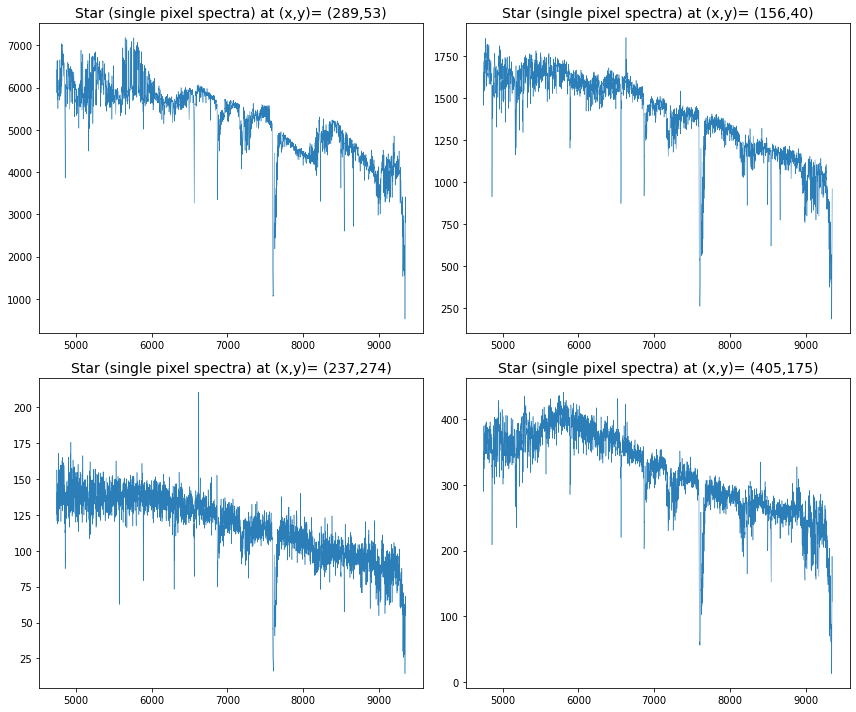

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = np.array(axes).reshape(-1)
    
for i in range(4):
    lo, up = np.nanpercentile(images[i], 2), np.nanpercentile(images[i], 98)
    im = axes[i].plot(wave,cube[:,star_y[i],star_x[i]],linewidth=0.5,alpha=0.95)
    axes[i].set_title(lbls[i], fontsize=14)
    
# Hide unused subplots if grid has extra slots
for j in range(4, len(axes)):
    axes[j].axis('off')
    
    

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Median spectra of galaxy arm')

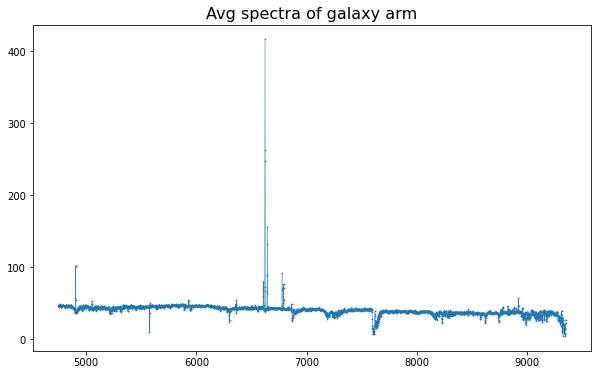

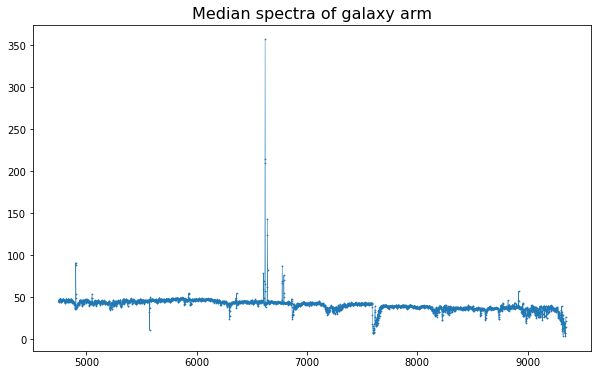

In [37]:
plt.figure(figsize=(10,6))

plt.plot(wave,avg_spectra_of_region(arm),linewidth=0.5,alpha=0.95)
plt.scatter(wave,avg_spectra_of_region(arm),s=0.5)
plt.title("Avg spectra of galaxy arm",fontsize=16)



plt.figure(figsize=(10,6))

median_arm=median_spectra_of_region(arm)
plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)
plt.title("Median spectra of galaxy arm",fontsize=16)

Text(0.5, 1.0, 'Median spectra of galaxy bg')

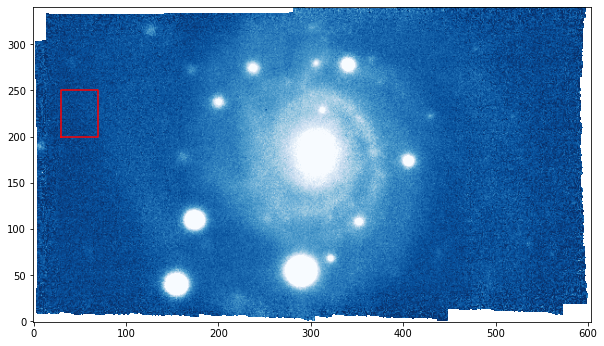

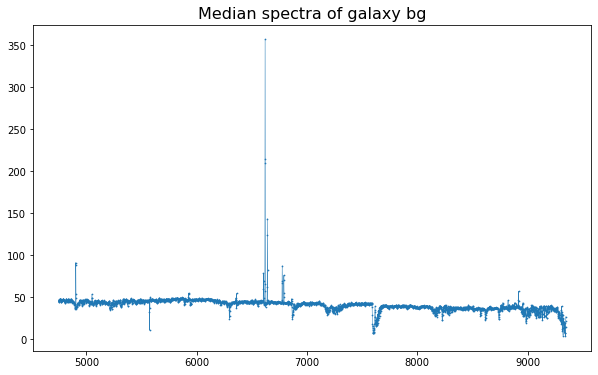

In [38]:
bg=cube[:,200:250,30:70]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [30, 30, 70, 70, 30]
y_coords = [200, 250, 250, 200, 200] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline




plt.figure(figsize=(10,6))

plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)
plt.title("Median spectra of galaxy bg",fontsize=16)

## Plotting uncertainty of spectra

In [39]:
uncertainty=ecube[:,200:250,30:70]
y_err=np.sqrt(np.median(uncertainty, axis=(1, 2)));

np.median(uncertainty[2])

88.63081

In [40]:
median_bg=median_spectra_of_region(bg)

y_err2=mad(median_bg)
print(y_err,y_err2)

[      nan 10.026817  9.414394 ...  6.174121  7.762108       nan] 0.21641612


In [41]:
np.sqrt(y_err[2])

3.0682886

In [44]:
median_bg=median_spectra_of_region(bg)

Text(0.5, 1.0, 'Background spectra')

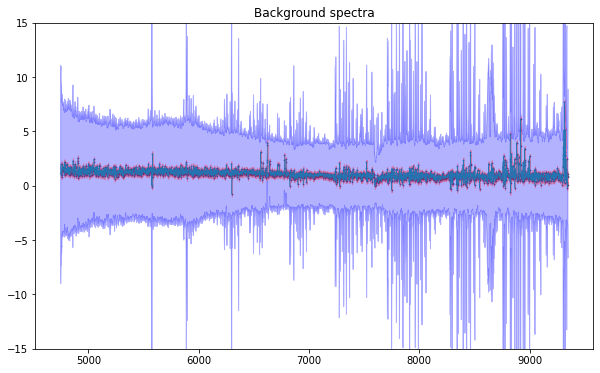

In [45]:
plt.figure(figsize=(10,6))

plt.plot(wave,median_bg,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bg,s=0.5)

plt.fill_between(wave,median_bg - y_err, median_bg + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(wave,median_bg - y_err2, median_bg + y_err2, color='red', alpha=0.3, label="Uncertainty")
plt.ylim(-15,15)

plt.title("Background spectra")

In [46]:
y_err2=mad(median_bulge)
print(y_err,y_err2)

[      nan 10.026817  9.414394 ...  6.174121  7.762108       nan] 3.808239


Text(0.5, 1.0, 'Bulge spectra')

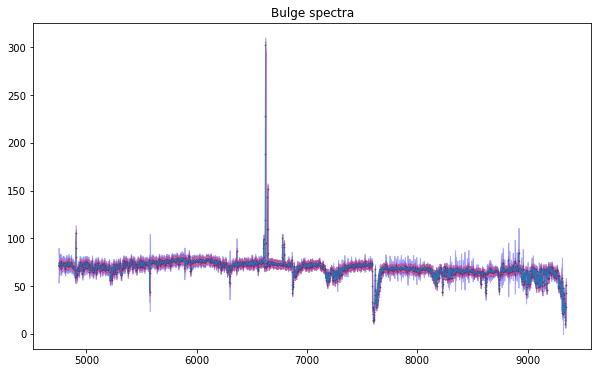

In [47]:
y_err=np.sqrt(np.median(ebulge, axis=(1, 2)));#median absolute deviaton=MAD

plt.figure(figsize=(10,6))

plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)

plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(wave,median_bulge - y_err2, median_bulge + y_err2, color='red', alpha=0.3, label="Uncertainty")
#plt.ylim(-15,15)
plt.title("Bulge spectra")

In [48]:
print("median snr of spectra is ",np.nanmedian(signaltonoise_spec(median_bulge,y_err)))

median snr of spectra is  13.528046


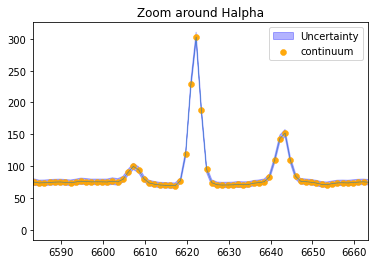

In [49]:
plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)

plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")

x_min, x_max= plt.xlim(halpha_obs-40,halpha_obs+40)
plt.title("Zoom around Halpha")
x_chopped,y_chopped=chop_data(wave,median_bulge,x_min,x_max)

plt.scatter(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")

plt.legend()

In [66]:
def smooth_spectra(y,kernel_size):

    kernel = cosine_kernel(kernel_size)
    y_smooth = convolve(y, kernel, mode='same')
    return y_smooth

def continuum(x,y,threshold=80):#threshold = 80  was based on experimentation...

    ## selecting points for continuum
    #continuum_mask = (y_chopped <= y_smooth * (1+threshold))  # points of smooothed spectra
    continuum_mask = y<threshold  # points of smooothed spectra
    x_continuum = (x)[continuum_mask]
    y_continuum = (y)[continuum_mask]


    
    ## fitting the selected points
    p_coeffs = np.polyfit(x_continuum, y_continuum, 4)
    fit = np.poly1d(p_coeffs)
    
    return fit


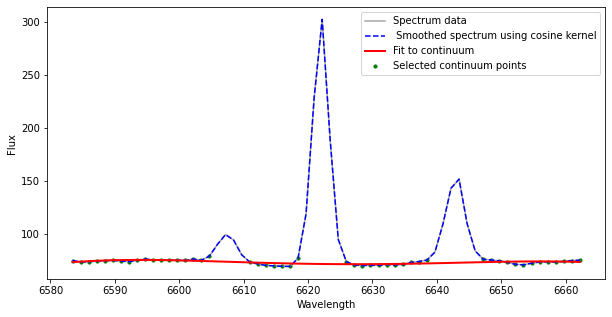

In [67]:
y_smooth=smooth_spectra(y_chopped,kernel_size=3)

continuum_fit=continuum(x_chopped,y_smooth)

y_continuum_fit = continuum_fit(x_chopped)


plt.figure(figsize=(10, 5))
plt.plot(x_chopped, y_chopped, label="Spectrum data", color="gray", alpha=0.7)
plt.plot(x_chopped, y_smooth, label=" Smoothed spectrum using cosine kernel", color="blue", linestyle="--")
plt.plot(x_chopped, y_continuum_fit, label="Fit to continuum", color="red", linewidth=2)
plt.scatter(x_continuum, y_continuum, color="green", s=10, label="Selected continuum points")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
#plt.xlim(6400,6500)
plt.show()

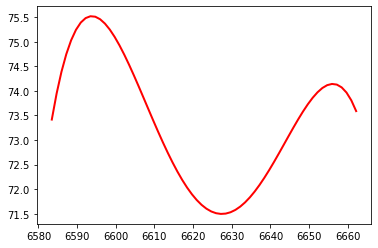

In [71]:
plt.plot(x_chopped, y_continuum_fit, label="Fitted Continuum (5th order)", color="red", linewidth=2)


Text(0.5, 1.0, 'Zoom around Halpha')

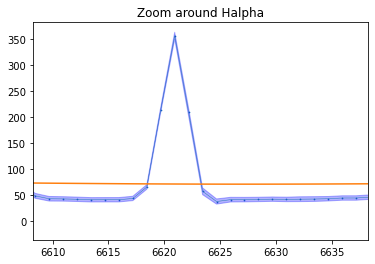

In [73]:
plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)

plt.fill_between(wave,median_arm - y_err, median_arm + y_err, color='blue', alpha=0.3, label="Uncertainty")
#plt.ylim(-5,100)
plt.xlim(halpha_obs-15,halpha_obs+15)
plt.plot(x_chopped,y_continuum_fit)
plt.title("Zoom around Halpha")

Fitted Amplitude (A): 273.64393394258764
Fitted Mean (mu): 6622.004933078535
Fitted Standard Deviation (sigma): 1.9796754082971693
Integral using Simpson's rule: 1277.3566


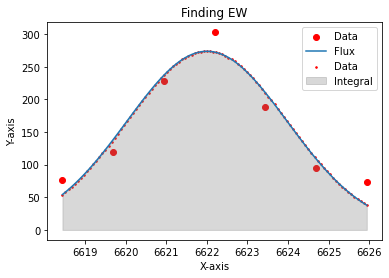

In [74]:
bound1=int(findWavelengths(wave, 6618)[1])
bound2=int(findWavelengths(wave, 6627)[1])

x = wave[bound1:bound2]
y = median_bulge[bound1:bound2]


initial_guess = initial_guess = [max(y), np.mean(x), np.std(x)]

params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)
A_fit, mu_fit, sigma_fit = params


x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, params[0], params[1], params[2])



# Print fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Mean (mu): {mu_fit}")
print(f"Fitted Standard Deviation (sigma): {sigma_fit}")


##

xx = np.linspace(x_fit[0],x_fit[len(x_fit)-1], 100)  

#integral
integral_simps = simps(y_fit, xx)

print(f"Integral using Simpson's rule: {integral_simps:.4f}")

plt.scatter(x, y, label="Data", color="red")
plt.plot(xx, y_fit, label="Flux")
plt.scatter(xx, y_fit, label="Data", color="red",s=2.4)
#plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(xx, y_fit, alpha=0.3, color='gray', label="Integral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Finding EW")
plt.show()


integrating smoothed spectra

In [89]:
def EW(flux,continuum,b1,b2):
    
    xx=np.linspace(b1,b2, 50)  # Generate 50 new points
    
    delta=(b2-b1)/50
    
    val=0
    for x in xx:
        val+=delta*(continuum(x)-flux(x))/continuum(x)
    
    return val



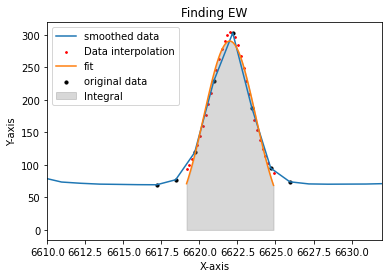

EW calculated through a parametric approach is ==  -9.63790563489963


In [149]:
##1*



plt.plot(x_chopped, y_smooth,label="smoothed data")
x_original,y_original=chop_data(x_chopped, y_smooth,6617,6627)


interp_func = interp1d(x_original, y_original, kind='cubic')
x = np.linspace(min(x_original), max(x_original), 50)  # Generate 50 new points
y = interp_func(x)



bound1=6619
bound2=6625
xxx,yyy=chop_data(x,y,bound1,bound2)
####

def finding_ew(x,y,continuum_fit,plots=True):

    initial_guess = initial_guess = [max(y), np.mean(x), np.std(x)]
    params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)
    A_fit, mu_fit, sigma_fit = params


    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = gaussian(x_fit, params[0], params[1], params[2])


    ## integrate
    integral_simps = simps(y_fit, x_fit)


    plt.scatter(x, y, label="Data interpolation", color="red",s=3)
    plt.plot(x_fit, y_fit, label="fit")
    plt.scatter(x_original, y_original, label="original data", color="black",s=10)
    plt.fill_between(x_fit, y_fit, alpha=0.3, color='gray', label="Integral")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.title("Finding EW")
    plt.xlim(6610,6632)
    plt.show()
    
    fitted_gaussian = lambda x: gaussian(x,*params)

    #fitted_gaussian(6620)
    
    return(EW(fitted_gaussian,continuum_fit,bound1,bound2))
    
print("EW calculated through a parametric approach is == ", finding_ew(xxx,yyy,continuum_fit,plots=False))

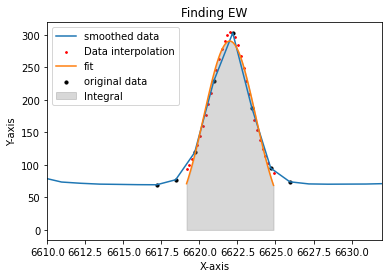

In [83]:
"""plt.plot(x_chopped, y_smooth,label="smoothed data")
x_original,y_original=chop_data(x_chopped, y_smooth,6617,6627)
interp_func = interp1d(x_original, y_original, kind='cubic')
x = np.linspace(min(x_original), max(x_original), 50)  # Generate 50 new points
y = interp_func(x)



bound1=6619
bound2=6625
x,y=chop_data(x,y,bound1,bound2)
####


initial_guess = initial_guess = [max(y), np.mean(x), np.std(x)]
params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)
A_fit, mu_fit, sigma_fit = params


x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, params[0], params[1], params[2])


## integrate
integral_simps = simps(y_fit, x_fit)


plt.scatter(x, y, label="Data interpolation", color="red",s=3)
plt.plot(x_fit, y_fit, label="fit")
plt.scatter(x_original, y_original, label="original data", color="black",s=10)
plt.fill_between(x_fit, y_fit, alpha=0.3, color='gray', label="Integral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Finding EW")
plt.xlim(6610,6632)
plt.show()""";

## EW maps

picking region

In [135]:
x1=320
x2=420
y1=120
y2=200

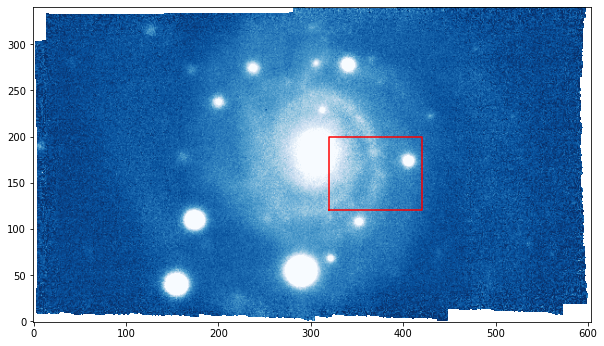

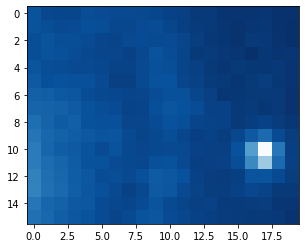

(16, 20)


In [184]:
region=cube[:,y1:y2,x1:x2]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [x1, x1, x2, x2, x1]
y_coords = [y1, y2, y2, y1, y1] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline

plt.show()

plt.imshow(binning(region[10], 5),"Blues_r");

plt.show()

print(np.shape(binning(region[10], 5)))

In [189]:
binned_region=[]

for w in range(0,len(wave)):
    binned_region.append(binning(region[w], 5))

In [193]:
print(np.shape(binned_region))

(3681, 16, 20)


In [195]:
def EW_map(cube_region,wave,central_wavelength,kernel_size=3):
        

    x_len=len(cube_region[0][0])
    y_len=len(cube_region[0])
    
    map=np.zeros((x_len, y_len))
    
    for i in range(0,x_len):
        for j in range(0,y_len):
            
            spec=region[:,j,i]
            
            # chop data
            x_min, x_max= plt.xlim(central_wavelength-40,central_wavelength+40)
            x_chopped,y_chopped=chop_data(wave,spec,x_min,x_max)

            
            # smooth data
            y_smooth=smooth_spectra(y_chopped,kernel_size)
            continuum_fit=continuum(x_chopped,y_smooth)
            y_continuum_fit = continuum_fit(x_chopped)
    
            # integrating the smoothed spectra
            ## see 1*
            
            
            #ew=finding_ew(xxx,yyy,continuum_fit,plots=False)
            #print("EW=",ew," at (i,j)=",i,",",j)
            
    return map

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

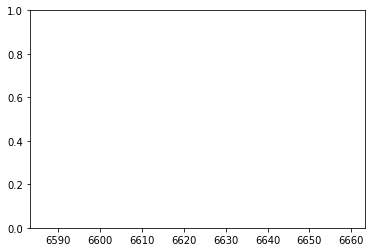

In [196]:
EW_map(binned_region,wave,halpha_obs)

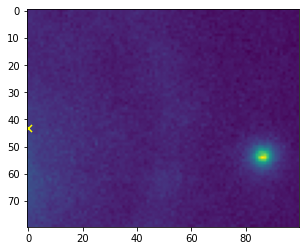

In [179]:
"""plt.plot(wave,region[:,0,43])



"""
plt.scatter([0],[43],s=50,marker='x',c='yellow')
plt.imshow(region[100])

## EW through non parametric approach

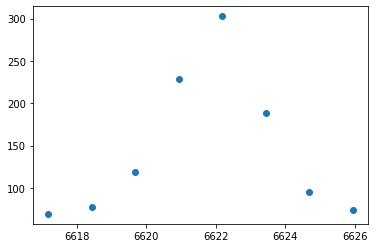

In [476]:
plt.scatter(x_original,y_original)

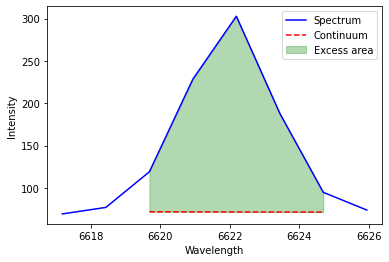

Integratal of area over continuum divided by continuum: -9.44


In [505]:
# Define peak region
peak_mask = (x_original >= bound1) & (x_original <= bound2)
wavelength_peak = x_original[peak_mask]
spectrum_peak = y_original[peak_mask]
continuum_peak = continuum_fit(wavelength_peak)

# Compute the excess intensity above the continuum
excess_intensity = (continuum_peak-spectrum_peak)/continuum_peak

# Integrate the excess intensity (area over the continuum)
area_over_continuum = simps(excess_intensity, wavelength_peak)
#continuum_summed = simps(continuum_fit(wavelength_peak), wavelength_peak)


plt.plot(x_original, y_original, label="Spectrum", color="blue")
plt.plot(wavelength_peak, continuum_peak, label="Continuum", linestyle="dashed", color="red")
plt.fill_between(wavelength_peak, continuum_peak, spectrum_peak, alpha=0.3, color="green", label="Excess area")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.legend()
plt.show()

print(f"Integratal of area over continuum divided by continuum: {area_over_continuum:.2f}")


## Voronoi binning

goal: reach a chosen constant S/N per bin

I will choose noise to be a constant, the standard deviation of the pixel values divided by 50.

In [25]:
header;


selection=findWavelengths(wave, 5000)
selection[1]
cube[selection[1]]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype='>f4')

In [24]:
len(final_x)

NameError: name 'final_x' is not defined

what should I use for the parameter pixelsize? Do i knwo the pixel scale of the cubes?

In [ ]:
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data=cube[selection[1]]
x_len=len(data)
y_len=len(data[0])

#creating arrays of grid x_positions and y_positions

x=range(0,x_len)
y=range(0,y_len)
final_x=[]
final_y=[]
final_signal=[]
j=0
for yy in y:
    i=0
    for xx in x:
        i+=1
        if i%100==0 & j%100==0:
            final_x.append(xx)
            final_y.append(yy)
            final_signal.append(data[xx,yy])
    j+=1
        


target_sn = 10 #whats a good target S/N?

final_x=np.array(final_x)
final_y=np.array(final_y)
final_signal=np.array(final_signal)

# Create a mask that is True where the values are not NaN
mask = ~np.isnan(final_x) & ~np.isnan(final_y) & ~np.isnan(final_signal)

# Apply the mask to filter out NaN values
#print(final_x, final_y, final_signal)2
final_x = final_x[mask]
final_y = final_y[mask]
final_signal = final_signal[mask]

# Print out the filtered arrays to check
#print(final_x, final_y, final_signal)


std_dev=np.nanstd(data)
noise = np.full(shape=len(final_signal),fill_value=std_dev/50)

# Compute Voronoi bins
out=voronoi_2d_binning(final_x, final_y, final_signal, noise, target_sn, plot=True,pixelsize=1)

plt.show();

## Spectra at Hα

In [240]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

#plot_image(cube[index],wavelen,index,'Blues_r')


data=cube[index]

In [241]:
from astropy.stats import sigma_clipped_stats,gaussian_sigma_to_fwhm

from photutils import DAOStarFinder

mean, median, std = sigma_clipped_stats(data, sigma=5.0,maxiters=5) 
print((mean, median, std))

daofind = DAOStarFinder(fwhm=50, threshold=10.*std)

sources = daofind(data)

print("     Found %i stars in image " %len(sources))

(39.827423, 13.7210865, 63.754784)
     Found 6 stars in image 


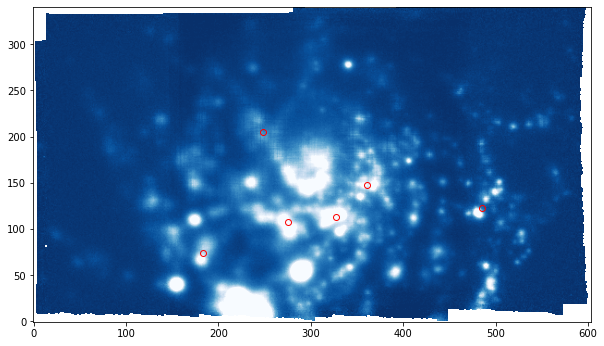

In [242]:

lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
plt.figure(figsize=(10, 8))
plt.imshow(data,cmap='Blues_r',origin='lower',clim=(lo,up))
        
        
plt.plot(sources["xcentroid"],sources["ycentroid"],'or',mfc='none');

In [245]:
#defining (x,y) where we want to observe the spectra

i_brightest=np.argsort(sources['flux'])[0]

x_pos=int(sources[i_brightest][1])
y_pos=int(sources[i_brightest][2])

plotting spectra

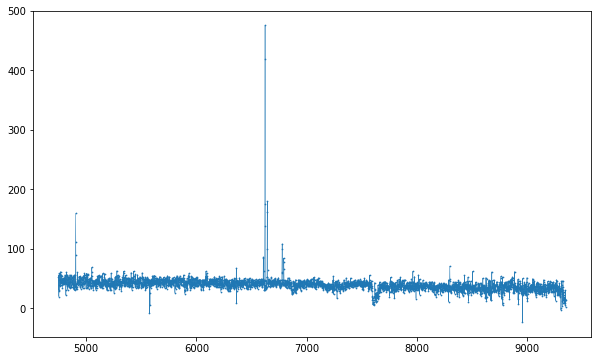

In [246]:
specdata=cube[:,y_pos,x_pos]

plt.figure(figsize=(10,6))

plt.plot(wave,specdata,linewidth=0.5,alpha=0.95)
plt.scatter(wave,specdata,s=0.5)

Text(0.5, 1.0, 'Zoom in Halpha emission region')

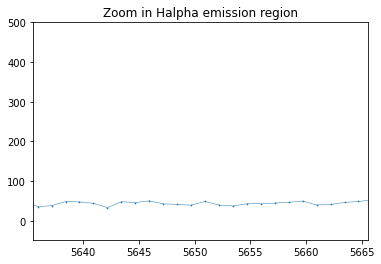

In [253]:
plt.plot(wave,specdata,linewidth=0.5,alpha=0.95)
plt.scatter(wave,specdata,s=0.5)

plt.xlim(halpha_obs-15,halpha_obs+15)
#plt.ylim(-20,90)
plt.title("Zoom in Halpha emission region")

fitting a Gaussian

In [64]:
bound1=int(findWavelengths(wave, 6618)[1])
bound2=int(findWavelengths(wave, 6625)[1])

In [66]:
x = wave[bound1:bound2]
y = specdata[bound1:bound2]

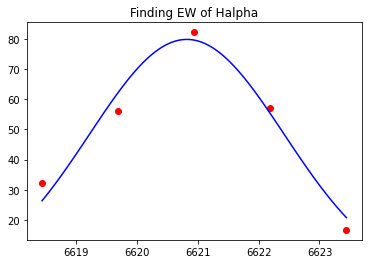

Fitted Amplitude (A): 79.7570857754474
Fitted Mean (mu): 6620.82077366716
Fitted Standard Deviation (sigma): 1.5989482179390269


In [67]:
initial_guess = [max(y), x[np.argmax(y)], 1]

params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)
A_fit, mu_fit, sigma_fit = params


x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, params[0], params[1], params[2])

plt.scatter(x, y, label="Data", color="red")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="blue")

plt.title("Finding EW of Halpha")
plt.show()


# Print fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Mean (mu): {mu_fit}")
print(f"Fitted Standard Deviation (sigma): {sigma_fit}")

Integral using Simpson's rule: 281.6268


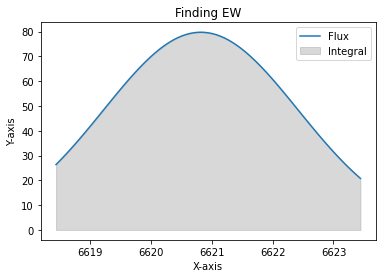

In [77]:

from scipy.integrate import simps

x = np.linspace(x_fit[0],x_fit[len(x_fit)-1], 100)  

# Compute the integral using Simpson's rule
integral_simps = simps(y_fit, x)

print(f"Integral using Simpson's rule: {integral_simps:.4f}")

# Plot the curve
plt.plot(x, y_fit, label="Flux")
plt.fill_between(x, y_fit, alpha=0.3, color='gray', label="Integral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Finding EW")
plt.show()


## Using Specutils

In [79]:
#from astropy.io import fits

from astropy import units as u

from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f656aa54e80>

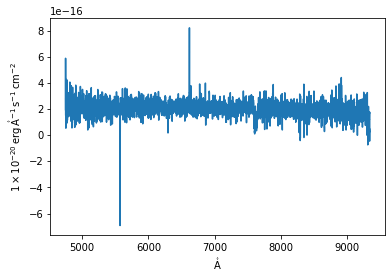

In [80]:
from specutils import Spectrum1D

lamb = wave * u.AA 

flux = specdata * 10**-17 * u.Unit(str(header["BUNIT"])) #taking the units from the header of the cube

spec = Spectrum1D(spectral_axis=lamb, flux=flux)

f, ax = plt.subplots()  

ax.step(spec.spectral_axis, spec.flux) 
#ax.set_xlim(halpha_obs-15,halpha_obs+15)

Calculating SNR of the spectra

In [81]:
from specutils.analysis import snr_derived

snr_derived(spec)

<Quantity 4.432747>

In [82]:
import warnings

from specutils.fitting import fit_generic_continuum

with warnings.catch_warnings():  # Ignore warnings

    warnings.simplefilter('ignore')

    #normalizing by continuum estimate
    cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 

In [130]:
fit_generic_continuum.param_names

AttributeError: 'function' object has no attribute 'param_names'

ESTE ajuste está onde? fit_generic_continuum

(6598.263076399999, 6648.263076399999)

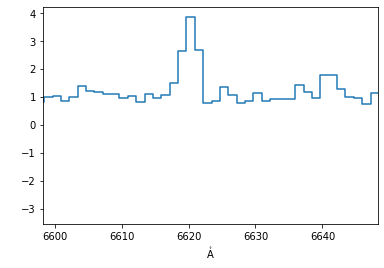

In [83]:
f, ax = plt.subplots()  

ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)  

ax.set_xlim((halpha_obs-25)/10 * u.nm,(halpha_obs+25)/10 * u.nm)  

In [84]:
from specutils import SpectralRegion

from specutils.analysis import equivalent_width

equivalent_width(cont_norm_spec, regions=SpectralRegion((halpha_obs-25)/10 * u.nm,(halpha_obs+25)/10 * u.nm))

<Quantity -11.53433117 Angstrom>

### Slicing a spectra into a particular region of interest

In [85]:
from specutils.manipulation import spectral_slab

ss = spectral_slab(cont_norm_spec, 5000.*u.AA, 5003.*u.AA)
ss

<Spectrum1D(flux=<Quantity [1.0896934 , 0.89806395]> (shape=(2,), mean=0.99388); spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [5000.94238281 5002.19238281] Angstrom> (length=2))>

### Calculating Moments

In [86]:
from specutils.analysis import moment

m = moment(spec, order=1) 

m.shape  


print(m)

6953.192735554875 Angstrom


## Line Finding

In [87]:
cont_norm_spec; #continuum normalized spectra

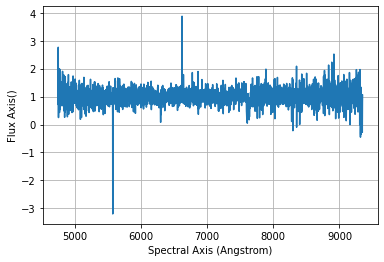

In [88]:
plt.plot(cont_norm_spec.spectral_axis, cont_norm_spec.flux) 

plt.xlabel('Spectral Axis ({})'.format(cont_norm_spec.spectral_axis.unit)) 

plt.ylabel('Flux Axis({})'.format(cont_norm_spec.flux.unit)) 

plt.grid(True)

Estimating uncertainty

In [89]:
ss = spectral_slab(cont_norm_spec, (halpha_obs-10)*u.AA, (halpha_obs+10)*u.AA) 
ss

<Spectrum1D(flux=<Quantity [0.83285743, 1.13031769, 0.9865351 , 1.07730173, 1.52001143,
           2.64860749, 3.87609295, 2.69161481, 0.78927651, 0.85823559,
           1.35906313, 1.08187466, 0.78013955, 0.85364203, 1.13819795,
           0.84613211]> (shape=(16,), mean=1.40437); spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [6613.44238281 6614.69238281 6615.94238281 ... 6629.69238281 6630.94238281
 6632.19238281] Angstrom> (length=16))>

In [90]:
from specutils.manipulation import noise_region_uncertainty

noise_region = SpectralRegion(0*u.um, 3*u.um)

cont_norm_spec = noise_region_uncertainty(ss, noise_region)

from specutils.fitting import find_lines_threshold

lines = find_lines_threshold(ss, noise_factor=3)  

lines[lines['line_type'] == 'emission']


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


<QTable length=1>
  line_center   line_type line_center_index
    Angstrom                               
    float64        str8         int64      
--------------- --------- -----------------
6620.9423828125  emission                 6

### Parameter Estimation

our specdata is in units 10**(-20) erg / (Angstrom s cm2) so we have to convert it to Jy using:

1 Jy = 10**(-23) erg/(cm^2)

In [91]:
(str(header["BUNIT"]))

'10**(-20)*erg/s/cm**2/Angstrom'

In [92]:
"""auxspec=specdata*10**(20) #this is in erg / (Angstrom s cm2)
auxspec=specdata*10**(20)*10**(-10) #this is in erg / ( s cm2)"""
auxspec=specdata*halpha_obs**2/(3.34*10**(-19))

In [93]:
lamb = wave * u.AA 
flux = auxspec * u.Unit(str('Jy')) 

spec = Spectrum1D(spectral_axis=lamb, flux=flux)

In [99]:
from specutils import SpectralRegion

from specutils.fitting import estimate_line_parameters

from specutils.manipulation import extract_region

sub_region = SpectralRegion((halpha_obs-25)/10 *u.um, (halpha_obs+25)/10 *u.um)

sub_spectrum = extract_region(spec, sub_region)

In [100]:
result = estimate_line_parameters(spec, models.Gaussian1D())

print(result.amplitude)

print(result.mean) 

print(result.stddev) 

Parameter('amplitude', value=1.0786672501485288e+28, unit=Jy)
Parameter('mean', value=6953.192977414863, unit=Angstrom)
Parameter('stddev', value=1309.7939786398235, unit=Angstrom, bounds=(1.1754943508222875e-38, None))


In [97]:
from astropy.modeling import models
from specutils.fitting import fit_lines
from astropy import units as u


# Fit the spectrum and calculate the fitted flux values (``y_fit``)
g_init = models.Gaussian1D(amplitude=1.1*u.Jy, mean=halpha_obs*u.um, stddev=13*u.um)
g_fit = fit_lines(spec, g_init)


y_fit = g_fit(x*u.um)

# Plot the original spectrum and the fitted.
plt.plot(spec, , label="Original spectrum")
plt.plot(spec, y_fit, label="Fit result")
plt.title('Single fit peak')
plt.grid(True)
plt.legend()

SyntaxError: invalid syntax (1266487270.py, line 14)